## Classification

> Type of supervised learning that specifies a class to which data elements belong.

> **binary/binomial classification** - 2 classes involved.

> **multi-class classification** - More than 2 classes invovlved. 

**classification Algorithms**:
* Linear Models:
     * Logistic Regression.
     * Support Vector Machines (SVM).
* Non-linear Models:
    * Naïve Bayes
    * Decision Tree Classification
    * Random Forest Classification.

* ![spam classification](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/11/classification.png)


### Logistic Regression

>  A statistical method for predicting binary classes that computes the probability of an event occurence.

> It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function. (Can be extended for multi-class classification too).

> It transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

> Multiple Linear Regression equation: **y = βo + β1x1 + β2x2 + … + βnxn + c.**

> Sigmoid Function:
     **p = 1/ (1 + e ^ −y)**   

> Logistic Regression:
     **p = 1/ (1 + e ^ −(βo + β1x1 + β2x2 + … + βnxn + c)**   

> Properties of Logistic Regression:
* The dependent variable in logistic regression follows Bernoulli Distribution (a special case of the two-point distribution, for which the possible outcomes need not be 0 and 1).
* Estimation is done through maximum likelihood and not Least Squares method.

> **Sigmoid Function**:
* The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. 

> **MLE**:
* The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.Linear Regression equation

> Types of Logistic Regression:
* **Binary Logistic Regression**: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
* **Multinomial Logistic Regression**: The target variable has three or more nominal categories such as predicting the type of Wine.
* **Ordinal Logistic Regression**: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5. (Review analysis).

> Linear vs Logistic Visual Comparison:
![Linear reg vs logistic reg](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

> **Pros**: doesn't require high computation power, easy to implement, easily interpretable, doesn't require scaling of features. 

> **Cons**: Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.


In [105]:
import pandas as pd
import numpy as np
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [106]:
# pd.DataFrame(data.groupby('Outcome'))

In [107]:
# loading diabetes dataset from kaggle
data = pd.read_csv("/home/ada/hub/MLClasses/datasets/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
data['Outcome'].unique()

array([1, 0])

In [109]:
#split dataset into independent and dependent variables
X = data.drop(['Outcome'], axis = 1) # Independent/predictor variables
y = data['Outcome'] # dependent/target variable
X.shape, y.shape

((768, 8), (768,))

In [110]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [111]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
regressor = LogisticRegression()

# fit the model with data
regressor.fit(x_train,y_train)

# make predictions
y_pred = regressor.predict(x_test)

y_pred[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0])

### Support Vector Machines

> Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

> **Support vectors** are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

> A **hyperplane** is a decision plane which separates between a set of objects having different class memberships.

> A **margin** is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

<img src='https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288454/index2_ub1uzd.png'>

> The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

> **non-linear and inseparable planes** - In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2 + y^2). Now you can easily segregate these points using linear separation.

<img src='https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index_bnr4rx.png'>

> **SVM kernels** - SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space.
> ..
* **Linear Kernel** A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values. (**K(x, xi) = sum(x * xi)**)

* **Polynomial Kernel** A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm. (**K(x,xi) = 1 + sum(x * xi)^d**)

* **RBF** can map an input space in infinite dimensional space.gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. (**K(x,xi) = exp(-gamma * sum((x – xi^2))**)
    
    


In [61]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [62]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [63]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [64]:
cancer.data.shape

(569, 30)

In [65]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [70]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


### Naive Bayes

> Naive Bayes classifiers are built on Bayesian classification methods. They rely on Bayes's theorem.We're interested in finding the probability of a label given some observed features, which we can write as P(L | features).It assumes that the effect of a particular feature in a class is independent of other features. 

> Naive Bayes classifier calculates the probability of an event in the following steps:
* Step 1: Calculate the prior probability for given class labels (spam/no spam).
* Step 2: Find Likelihood probability with each attribute for each class
* Step 3: Put these value in Bayes Formula and calculate posterior probability.
* Step 4: See which class has a higher probability, given the input belongs to the higher probability class.


In [97]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
predicted= model.predict(x_test)
print("Predicted Value:", predicted[-20:])

Predicted Value: [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]


In [98]:
## naive bayes with multiple labels

#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [102]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [103]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [104]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
y_pred[:20]

array([0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1])

### Model Evaluation

> **Confusion Matrix**: A confusion matrix is a table used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.


In [99]:
# import the metrics class
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[115,  15],
       [ 25,  37]])

> **Accuracy**: (True positives + True Negatives) / Total Predictions

> **Precision**: Precision is about being precise, i.e.,when a model makes a prediction, how often it is correct. In your prediction case, when the Logistic Regression model predicted patients are going to suffer from diabetes, the patients will suffer/have 71% of the time.

> **Recall**: If there are patients who have diabetes in the test set then your Logistic Regression model can identify it 59% of the time.

In [100]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7916666666666666
Precision: 0.7115384615384616
Recall: 0.5967741935483871


> **ROC Curve** - Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

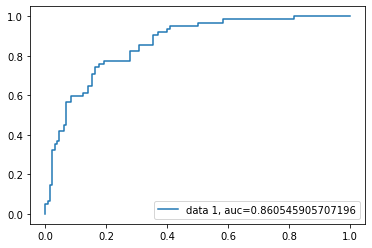

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba = regressor.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)  # area under the roc curve
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.